In [ ]:
# Бобровко Валерий Иванович - Очно - Б4 Б9

In [ ]:
# Задание Б9 - Кластеризовать квартиры из выборки по общему и жилому метражу на основе их цены

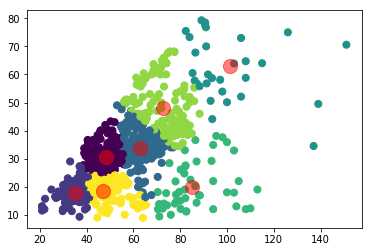

In [44]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

cluster_data = pd.read_csv('realtXY16.csv')

cluster_data.drop(cluster_data.columns[[0, 4, 6, 16]], axis=1, inplace=True)
cluster_data = cluster_data[pd.notnull(cluster_data)]

# Delete invalid data
indexes = []
for index, row in cluster_data.iterrows():
    if (math.isnan(row['Жилая']) == True
        or row['Жилая'] > 80
        or math.isnan(row['Общая']) == True 
        or row['Общая'] > 200):
        indexes.append(index)

cluster_data = cluster_data.drop(indexes, axis = 0)
indexes.clear()

#Delete unused columns
cluster_data.drop(cluster_data.columns[[0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15]], axis=1, inplace=True)

classes = cluster_data['Цена']
tmp = cluster_data.drop(['Цена'], axis=1)
data = tmp.values.tolist()
data = np.array(data)

data, classes = shuffle(data,classes)
train_data = data[:1000]
test_data = data[1000:]

clf = KMeans(n_clusters = 7)
clf.fit(data)

pred = clf.predict(test_data)
centers = clf.cluster_centers_

plt.scatter(test_data[:, 0], test_data[:, 1], c=pred, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Задание Б4 - Предсказать цены на квартиры на основе их площадей

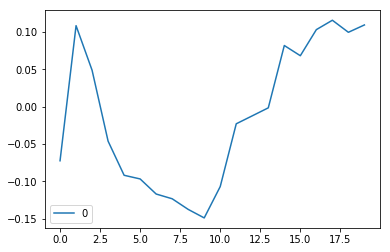

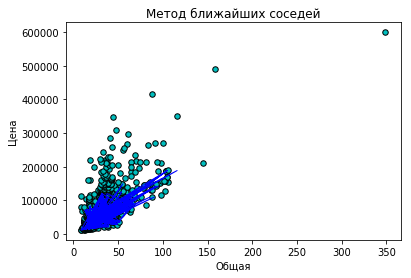

In [100]:
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
n_neighbors = 16
h = 0.02

neighbors_data = pd.read_csv('realtXY16.csv')

neighbors_data.drop(neighbors_data.columns[[0, 4, 6, 16]], axis=1, inplace=True)
neighbors_data = neighbors_data[pd.notnull(neighbors_data)]

# Delete invalid data
indexes = []
for index, row in neighbors_data.iterrows():
    if (row['Цена'] < 5000 
        or math.isnan(row['Цена']) == True):
        indexes.append(index)

neighbors_data = neighbors_data.drop(indexes, axis = 0)
indexes.clear()

for index, row in neighbors_data.iterrows():
    if (math.isnan(row['Общая']) == True 
        or math.isnan(row['Жилая']) == True 
        or math.isnan(row['Кухня']) == True):
        indexes.append(index)

neighbors_data = neighbors_data.drop(indexes, axis = 0)
indexes.clear()



neighbors_data.drop(neighbors_data.columns[[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15]], axis=1, inplace=True)

Y = neighbors_data['Цена']
neighbors_data.drop(['Цена'], axis=1, inplace=True)

X_train, X_holdout, y_train, y_holdout = train_test_split(neighbors_data.values, Y, test_size=0.3, random_state=17)

r2_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(X_holdout) 
    r2_val.append(r2_score(y_holdout, pred))

curve = pd.DataFrame(r2_val) #elbow curve

curve.plot()

knn = neighbors.KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

pred = knn.predict(X_holdout)

plt.figure()
plt.scatter(neighbors_data, Y, edgecolor="black", c="c", s=30, label="data")
plt.plot(X_holdout, pred, color="b", label="max_depth=5", linewidth=1)
plt.xlabel("Общая")
plt.ylabel("Цена")
plt.title("Метод ближайших соседей")
plt.show()